Criar um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

In [22]:
import pandas as pd

# pd.set_option('display.max_columns', None)

# Vamos carregar o arquivo csv em nosso drive e analisarmos o nosso dataframe
df_insurance = pd.read_csv("insurance.csv")
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
# para deixar todas as saídas com os mesmos valores obtidos na live.
import numpy as np
np.random.seed(42)
import os

# Para plots bonitinhos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [24]:
df_insurance.shape

(1338, 7)

In [25]:
# Analisando as informações do dataset
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# entender escala, dispersão e possíveis outliers
df_insurance.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [26]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1903ecb2510>,
 'caps': [<matplotlib.lines.Line2D at 0x1903ecb27b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1903ecb23c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1903ecb2a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1903ecb2ba0>],
 'means': []}

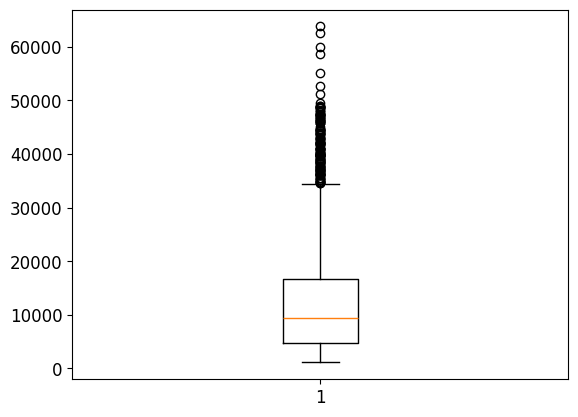

In [34]:
plt.boxplot(df_insurance['charges'])

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

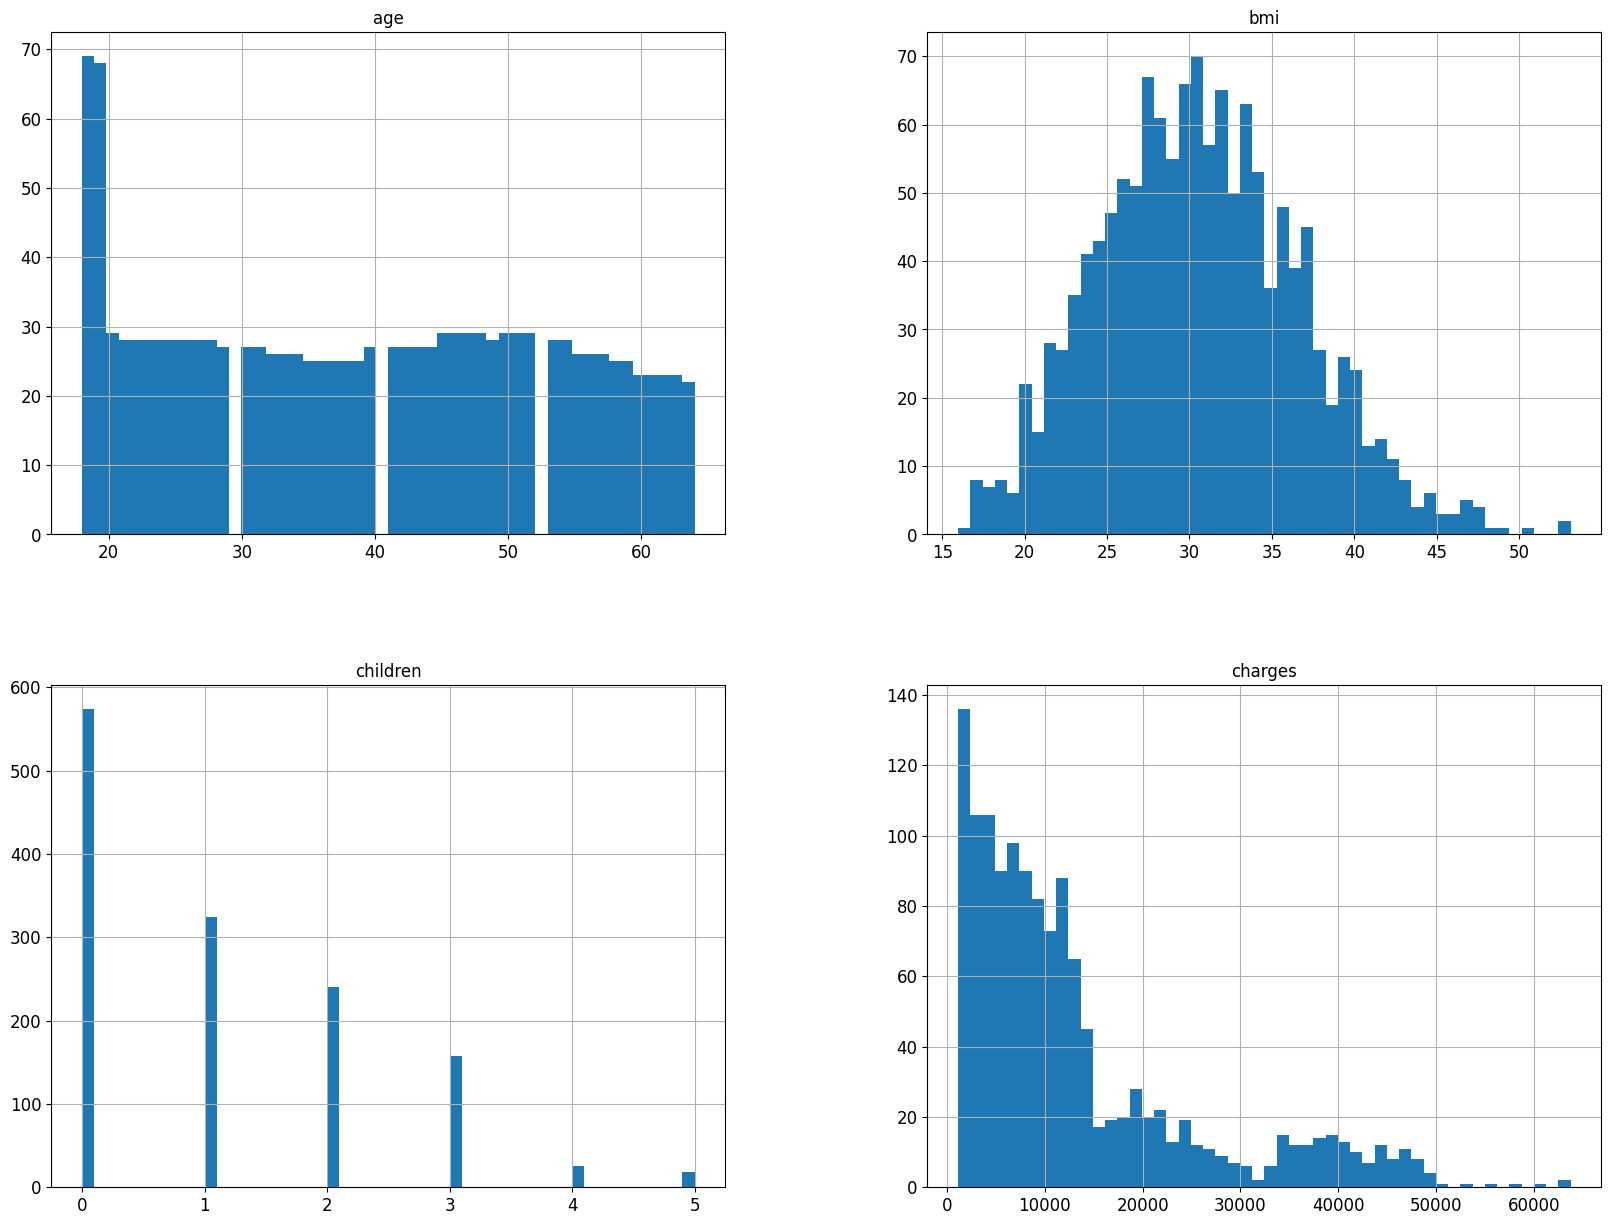

In [27]:
# Analisando algumas distribuições com histogramas
import matplotlib.pyplot as plt
df_insurance.hist(bins=50, figsize=(20,15))

In [40]:
cost_insurance = df_insurance.copy()
# Buscando correlações entre as variáveis
corr_matrix = cost_insurance.select_dtypes(include=[np.number]).corr()
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Ajustar e transformar os rótulos
df_insurance['sex'] = label_encoder.fit_transform(df_insurance['sex'])
df_insurance['smoker'] = label_encoder.fit_transform(df_insurance['smoker'])
df_insurance['region'] = label_encoder.fit_transform(df_insurance['region'])

df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
# Separando as variáveis preditoras (X) da variável alvo (y)
X = df_insurance.drop('charges', axis=1)
y = df_insurance['charges']

In [ ]:
# Separando as bases em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(len(X_train), "feature de treinamento +", len(X_test), "teste")

1070 feature de treinamento + 268 teste
      age  sex     bmi  children  smoker  region
560    46    0  19.950         2       0       1
1285   47    0  24.320         0       0       0
1142   52    0  24.860         0       0       2
969    39    0  34.320         5       0       2
486    54    0  21.470         3       0       1
...   ...  ...     ...       ...     ...     ...
1095   18    0  31.350         4       0       0
1130   39    0  23.870         5       0       2
1294   58    1  25.175         0       0       0
860    37    0  47.600         2       1       3
1126   55    1  29.900         0       0       3

[1070 rows x 6 columns]


In [42]:
# Criando e treinando o modelo de regressão linear
from sklearn.linear_model import LinearRegression

regressaoLinear = LinearRegression()
regressaoLinear.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = regressaoLinear.predict(X_test)

In [43]:
# Avaliando o desempenho do modelo

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = mean_squared_error(y_test, previsoes)
mae = mean_absolute_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

RMSE: 33635210.431178406
MAE: 4186.508898366432
R²: 0.7833463107364539
